In [1]:
from scipy.stats import f_oneway
from scipy.stats import kruskal

import pandas as pd
import numpy as np
import tellurium as te

import statsmodels.api as sm
from statsmodels.formula.api import ols

import scipy as sp

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import os

import gzip
import cloudpickle

In [3]:
os.chdir('..')
from src import util
os.chdir('notebooks')

WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Quantifying the number of FCCs in top ten that were predicted correctly by BMCA


## Visualizing Spearman data 

### Graph Spearman data

In [3]:
#spr_df = pd.read_csv('../data/results/spearman_coefficients/topologyC_allData_spr.csv')
spr_df = pd.read_csv('../data/results/spearman_coefficients/topologyC_emll_spr.csv')
spr_df.rename(columns={'Unnamed: 0': 'pt_lvl'}, inplace=True)
spr_df

,pt_lvl,r,p-value,lower,upper
0,0.5x,0.261433,0.03260,-0.007976,0.498054
1,1.5x,0.144864,0.24215,-0.139492,0.384847


(0.0, 1.05)

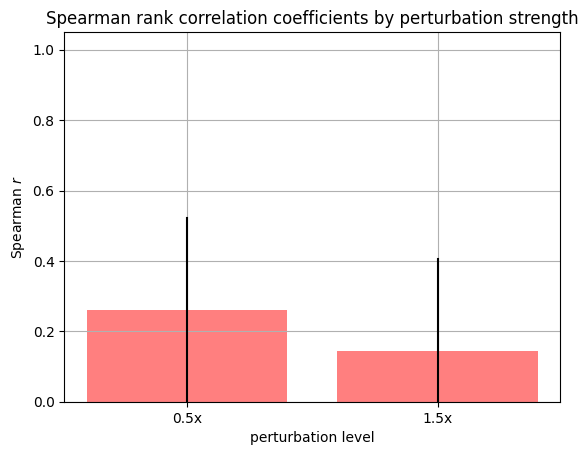

In [4]:
plt.bar(spr_df['pt_lvl'], spr_df['r'], alpha=0.5, color='r')
plt.grid()

plt.axvline(0, spr_df[spr_df['pt_lvl']=='0.5x']['lower'].values[0], spr_df[spr_df['pt_lvl']=='0.5x']['upper'].values[0], c='k')
plt.axvline(1, spr_df[spr_df['pt_lvl']=='1.5x']['lower'].values[0], spr_df[spr_df['pt_lvl']=='1.5x']['upper'].values[0], c='k')

plt.title("Spearman rank correlation coefficients by perturbation strength")
plt.xlabel('perturbation level')
plt.ylabel('Spearman $\it{r}$')
plt.ylim((0, 1.05))

## Visualizing MAE across the different types of data

In [5]:
MAE_df = pd.read_csv('../data/results/MAE/topologyC_allData_MAE.csv')
MAE_df.rename(columns={'Unnamed: 0': 'pt_lvl', '0': 'values'}, inplace=True)
MAE_df['values'] = MAE_df['values']/4352
MAE_df

,pt_lvl,values
0,gt,0.000000
1,0.5x,2.861646
2,1.5x,2.862109


Text(0, 0.5, 'MAE')

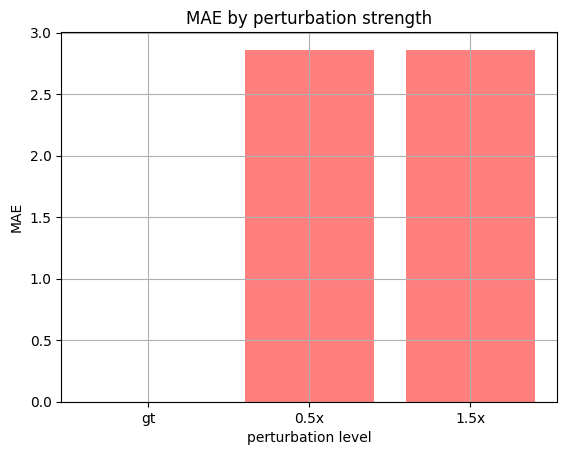

In [6]:
plt.bar(MAE_df['pt_lvl'], MAE_df['values'], alpha=0.5, color='r')
plt.grid()

# plt.axvline(0, MAE_df[MAE_df['pt_lvl']=='0.5x']['lower'].values[0], MAE_df[MAE_df['pt_lvl']=='0.5x']['upper'].values[0], c='k')
# plt.axvline(1, MAE_df[MAE_df['pt_lvl']=='1.5x']['lower'].values[0], MAE_df[MAE_df['pt_lvl']=='1.5x']['upper'].values[0], c='k')

plt.title("MAE by perturbation strength")
plt.xlabel('perturbation level')
plt.ylabel('MAE')


## Make tables of ranking correctness

In [3]:
# os.chdir('../data/results/rankings/')

In [4]:
rank_df = pd.read_csv('../data/results/rankings/topologyC_allData-5-15_rankings.csv')
rank_df

,v_ACE_OUT,gt,0.5x,1.5x
0,1.0,vACS,vXCH_ACE1,vGLT
1,2.0,vGLT,vATP_MAINTENANCE,vACS
2,3.0,vACK,vGLT,vXCH_ACE1
3,4.0,vGLC_feed,vACS,vPTA
4,5.0,vATP_MAINTENANCE,vGLC_feed,vACK
...,...,...,...,...
63,64.0,vGL6P_HYDROLYSIS,vS7P_R5P_TKT,vACN_1
64,65.0,vPTS_4,vPPS,vPPS
65,66.0,vPTS_3,vFBP,vFBP
66,67.0,vXCH_GLC,vGL6P_HYDROLYSIS,vGL6P_HYDROLYSIS


In [5]:
pt_labels = ['0.5x', '1.5x']
gt_ranks = rank_df['gt']

#### Counts of top three ranked FCCs

In [6]:
topThree_df = rank_df[rank_df['v_ACE_OUT'].isin([1, 2, 3])]
topThree_df

,v_ACE_OUT,gt,0.5x,1.5x
0,1.0,vACS,vXCH_ACE1,vGLT
1,2.0,vGLT,vATP_MAINTENANCE,vACS
2,3.0,vACK,vGLT,vXCH_ACE1


In [7]:
gt_t3_set = set(list(topThree_df['gt']))
gt_t3_set

{'vACK', 'vACS', 'vGLT'}

In [8]:
t3_sets = []
for pt in pt_labels: 
    t3_sets.append(set(list(topThree_df[pt])))

In [9]:
t3_scores=[]
for i in t3_sets: 
    t3_scores.append(len(set.intersection(gt_t3_set, i)))

In [10]:
t3_results = pd.DataFrame((np.array(t3_scores)).reshape((len(pt_labels),-1)).T, 
             columns=pt_labels)
t3_results

,0.5x,1.5x
0,1,2


In [11]:
# visualizations. Heatmaps?

#### Counts of top ten ranked FCCs

In [12]:
topTen_df = rank_df[rank_df['v_ACE_OUT'].isin([1,2,3,4,5,6,7,8,9,10])]
topTen_df

,v_ACE_OUT,gt,0.5x,1.5x
0,1.0,vACS,vXCH_ACE1,vGLT
1,2.0,vGLT,vATP_MAINTENANCE,vACS
2,3.0,vACK,vGLT,vXCH_ACE1
3,4.0,vGLC_feed,vACS,vPTA
4,5.0,vATP_MAINTENANCE,vGLC_feed,vACK
5,6.0,vATP_syn,vPTA,vGLC_feed
6,7.0,vPTA,vADK,vATP_MAINTENANCE
7,8.0,vNADH_req,vACK,vXCH_ACE2
8,9.0,vGROWTH,vATP_syn,vADK
9,10.0,vNDHII,vPFK,vENO


In [13]:
gt_t10_set = set(list(topTen_df['gt']))
gt_t10_set

{'vACK',
 'vACS',
 'vATP_MAINTENANCE',
 'vATP_syn',
 'vGLC_feed',
 'vGLT',
 'vGROWTH',
 'vNADH_req',
 'vNDHII',
 'vPTA'}

In [14]:
t10_sets = []
for pt in pt_labels: 
    t10_sets.append(set(list(topTen_df[pt])))

In [15]:
t10_scores=[]
for i in t10_sets: 
    t10_scores.append(len(set.intersection(gt_t10_set, i)))

In [16]:
t10_results = pd.DataFrame((np.array(t10_scores)).reshape((len(pt_labels),-1)).T, 
             columns=pt_labels)
t10_results

,0.5x,1.5x
0,7,6


In [ ]:
# difference
dif_list = []
for i in t10_sets: 
    dif_list.append(i.difference(gt_t10_set))

dif_list

In [32]:
for i in dif_list: 
    print(rank_df['gt'].loc[lambda x: x.isin(i)].index)

Int64Index([33, 43, 48], dtype='int64')
Int64Index([33, 38, 42, 43], dtype='int64')
